## Project Week 3 Valeeva

## Houses in emergency condition in Sverdlovsk region, Russia

In [7]:
import pandas as pd

In [9]:
df = pd.read_csv("Alarm_Sverd_Clean.csv")

In [17]:
#df.head()

### Total number of houses in emergency condition in the region

In [16]:
len(df.index)

3398

There is a total of 3398 houses in emergency condition in Sverdlovsk region, which is right in the middle of Russia. Houses in emergency condition are those that ...  

### % of houses in the region that are in emergency condition

In [19]:
round((len(df.index)/42210)*100)

8

### total number of people living in these conditions

In [20]:
df.residents_count.sum()

45607.0

### % of people in the region that live in emergency condition

In [22]:
round(df.residents_count.sum()/4290067*100)

1.0

In [25]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3398 entries, 0 to 3397
Data columns (total 74 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   house_id                       3398 non-null   int64  
 1   region_id                      3398 non-null   object 
 2   area_id                        1597 non-null   object 
 3   city_id                        3398 non-null   object 
 4   street_id                      3332 non-null   object 
 5   shortname_region               3398 non-null   object 
 6   formalname_region              3398 non-null   object 
 7   shortname_area                 1597 non-null   object 
 8   formalname_area                3398 non-null   object 
 9   shortname_city                 3398 non-null   object 
 10  formalname_city                3398 non-null   object 
 11  shortname_street               3332 non-null   object 
 12  formalname_street              3332 non-null   o

In [28]:
df.determined_date.head()

0    5/17/2018
1    9/28/2017
2    1/12/2004
3    1/12/2004
4    4/29/1980
Name: determined_date, dtype: object

In [29]:
df.exploitation_start_year.head()

0    1911.0
1    1951.0
2    1965.0
3    1955.0
4    1930.0
Name: exploitation_start_year, dtype: float64

In [32]:
#df.determined_date.str.split(pat="/")

In [35]:
new = df.determined_date.str.split("/", n = 2, expand = True)

In [37]:
new.head()

,0,1,2
0,5,17,2018
1,9,28,2017
2,1,12,2004
3,1,12,2004
4,4,29,1980


In [39]:
df["determined_year"] = new[2]

In [40]:
df.determined_year.head()

0    2018
1    2017
2    2004
3    2004
4    1980
Name: 2, dtype: object

In [46]:
df = df.dropna(subset=['determined_year'])

In [47]:
df.determined_year = df.determined_year.astype(int)

In [48]:
df['exploitation']=(df.determined_year-df.exploitation_start_year)

## On average, houses have been in use for 61 years before they are determined as emergency housing.

In [52]:
df['exploitation'].median()

61.0

### there are, however, some outliers, such as the oldest house which is more than 200 years old...

In [53]:
df['exploitation'].max()

204.0

In [56]:
pd.set_option('display.max_columns', None)

In [57]:
df.loc[df['exploitation'] == 204]

,house_id,region_id,area_id,city_id,street_id,shortname_region,formalname_region,shortname_area,formalname_area,shortname_city,formalname_city,shortname_street,formalname_street,house_number,building,block,letter,address,houseguid,cadastral_number,cadastral_registration_date,stage,built_year,exploitation_start_year,project_type,house_type,floor_count_max,floor_count_min,entrance_count,residents_count,area_total,area_residential,area_non_residential,area_common_property,area_land,monument_status,monument_document_date,monument_document_number,deterioration_total,determined_date,floor_type,wall_material,alarm_reason,alarm_reason_other,alarm_document_number,alarm_document_date,alarm_has_file,exp_name,exp_document_number,exp_document_date,exp_has_file,commission_document_number,commission_document_date,commission_has_file,further_use,decision_deadline_date,planned_resettlement_date,actual_resettlement_date,planned_demolition_date,planned_rooms_count,planned_rooms_square,planned_ppl_count,resettled_rooms_count,resettled_rooms_square,resettled_ppl_count,empty_rooms_count,empty_rooms_square,redemption_amount,planned_providing_area_square,address2,rest,rest.1,Unnamed: 72,Unnamed: 73,determined_year,exploitation
1152,8927972,92b30014-4d52-4e2e-892d-928142b924bf,NaN,4a90bd67-7682-4012-a0c5-09865b9d08a0,f34a5290-2b18-4649-a8ec-acf63bca8948,обл,Свердловская,NaN,г. Ирбит,г,Ирбит,ул,Ленина,19,NaN,NaN,NaN,"обл. Свердловская, г. Ирбит, ул. Ленина, д. 19",32d0e7de-079b-6e0a-b2cc-159ec5fa7b93,66:44:0101005:93,10/5/2005,Эксплуатируемый,1808.0,1808.0,NaN,Многоквартирный дом,2.0,2.0,2.0,87.0,"1730,5","1244,7",0,"485,8",1601,Не имеется,NaN,NaN,77,12/10/2012,NaN,NaN,Физический износ,NaN,1196-а,5/23/2013,Имеется,"ООО ""Актив Проект""",0362300228312000053-0198328-01,12/10/2012,Имеется,29,5/23/2013,Имеется,Снос,NaN,9/1/2025,NaN,12/31/2025,NaN,NaN,NaN,45.0,"845,7",87.0,2.0,"36,6","38080,36","875,11",обл. Свердловская,ул. Ленина,д. 19,NaN,NaN,2012,204.0


### or baby houses like this one which is just 1 year old but is already in emergency condition!

In [54]:
df['exploitation'].min()

1.0

In [ ]:
## Here is a distribution of the age of houses that are in emergency condition

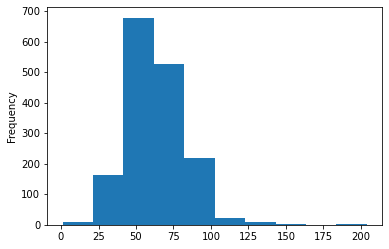

In [58]:
df['exploitation'].plot(kind='hist')

## As for the reason of the house being in emergency condition, it's mostly physical deterioration. However, fires are also a reason for 2% of the cases.

In [59]:
df.alarm_reason.value_counts()

Физический износ    1725
Пожар                 29
Иная                   1
Name: alarm_reason, dtype: int64

In [60]:
round(df.alarm_reason.value_counts(normalize=True)*100)

Физический износ    98.0
Пожар                2.0
Иная                 0.0
Name: alarm_reason, dtype: float64

## Resettlement

In [61]:
df.planned_resettlement_date.head()

0    9/17/2023
1    9/30/2024
2          NaN
3          NaN
4     9/1/2025
Name: planned_resettlement_date, dtype: object

In [62]:
df = df.dropna(subset=['planned_resettlement_date'])

In [63]:
new = df.planned_resettlement_date.str.split("/", n = 2, expand = True)

In [64]:
new.head()

,0,1,2
0,9,17,2023
1,9,30,2024
4,9,1,2025
5,9,1,2025
6,12,31,2022


In [65]:
df["resettlement_year"] = new[2]

In [67]:
df.resettlement_year.head()

0    2023
1    2024
4    2025
5    2025
6    2022
Name: resettlement_year, dtype: object

In [68]:
df.resettlement_year = df.resettlement_year.astype(int)

In [69]:
df['wait_years']=(df.resettlement_year-df.determined_year)

## On average, people wait for the resettlement for 10 years

In [70]:
df['wait_years'].median()

10.0

In [74]:
#df.loc[df['alarm_reason'] == 'Пожар'].groupby(by="resettlement_year")

In [86]:
df_fire = df[df['alarm_reason']=='Пожар']

In [92]:
#ok so our of 29 houses that were on fire I only have 12 with the filled resettlement year
len(df_fire)

12

In [ ]:
#we could use 0 as a replacement if this is not used throughout the dataset 

## And there are at least 6 houses that have been on fire but still waiting to be resettled!

In [99]:
len(df_fire[df_fire['resettlement_year']>2021])

6